In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [48]:
def SIR(data,pop,gamma,rep_num):
    
    beta = gamma * rep_num
    
    new_cases = beta * data['susceptible'] * data['cases_active'] / pop
    new_recovered = gamma * data['cases_active']
    
    susceptible = data['susceptible'] - new_cases
    cases = data['cases_active'] + new_cases - new_recovered
    rec = data['recovered'] + new_recovered
    
    return susceptible,new_cases,cases,new_recovered,rec

def SIRS(data,pop,gamma,rep_num,re_s):
    
    beta = gamma * rep_num
    
    new_cases = beta * data['susceptible'] * data['cases_active'] / pop
    new_recovered = gamma * data['cases_active']
    new_resusceptible = re_s * data['recovered']
    
    susceptible = data['susceptible'] - new_cases + new_resusceptible
    cases = data['cases_active'] + new_cases - new_recovered
    rec = data['recovered'] + new_recovered - new_resusceptible
    
    return susceptible,new_cases,cases,new_recovered,rec

In [42]:
pop = 1_000_000
seed = 4

data = {'susceptible' : [pop - seed],
        'new_cases' : [seed],
        'cases_active' : [seed],
        'new_recovered' : [0],
        'recovered' : [0]}

df1 = pd.DataFrame(data)

df1

,susceptible,new_cases,cases_active,new_recovered,recovered
0,999996,4,4,0,0


In [43]:
while(int(df1.loc[len(df1.index) - 1,'cases_active']) > 0):
    idx = len(df1.index)
    df1.loc[idx] = SIR(df1.loc[idx - 1],pop,1/7,2)
    if idx % 10 == 0:
        print(f'Day {idx}')
        time.sleep(0.5)

df

Day 10
Day 20
Day 30
Day 40
Day 50
Day 60
Day 70
Day 80
Day 90
Day 100
Day 110
Day 120
Day 130
Day 140
Day 150
Day 160
Day 170
Day 180
Day 190
Day 200
Day 210
Day 220
Day 230


,susceptible,new_cases,cases_active,new_recovered,recovered
0,999996,4,4,0,0
1,999994,1,4,0,0
2,999993,1,5,0,1
3,999992,1,5,0,1
4,999990,1,6,0,2
...,...,...,...,...,...
231,195001,0,1,0,804997
232,195001,0,1,0,804997
233,195001,0,1,0,804997
234,195001,0,1,0,804997


In [44]:
for i in df1.columns:
    df1[i] = df1[i].astype('int')
    
df1

,susceptible,new_cases,cases_active,new_recovered,recovered
0,999996,4,4,0,0
1,999994,1,4,0,0
2,999993,1,5,0,1
3,999992,1,5,0,1
4,999990,1,6,0,2
...,...,...,...,...,...
231,195001,0,1,0,804997
232,195001,0,1,0,804997
233,195001,0,1,0,804997
234,195001,0,1,0,804997


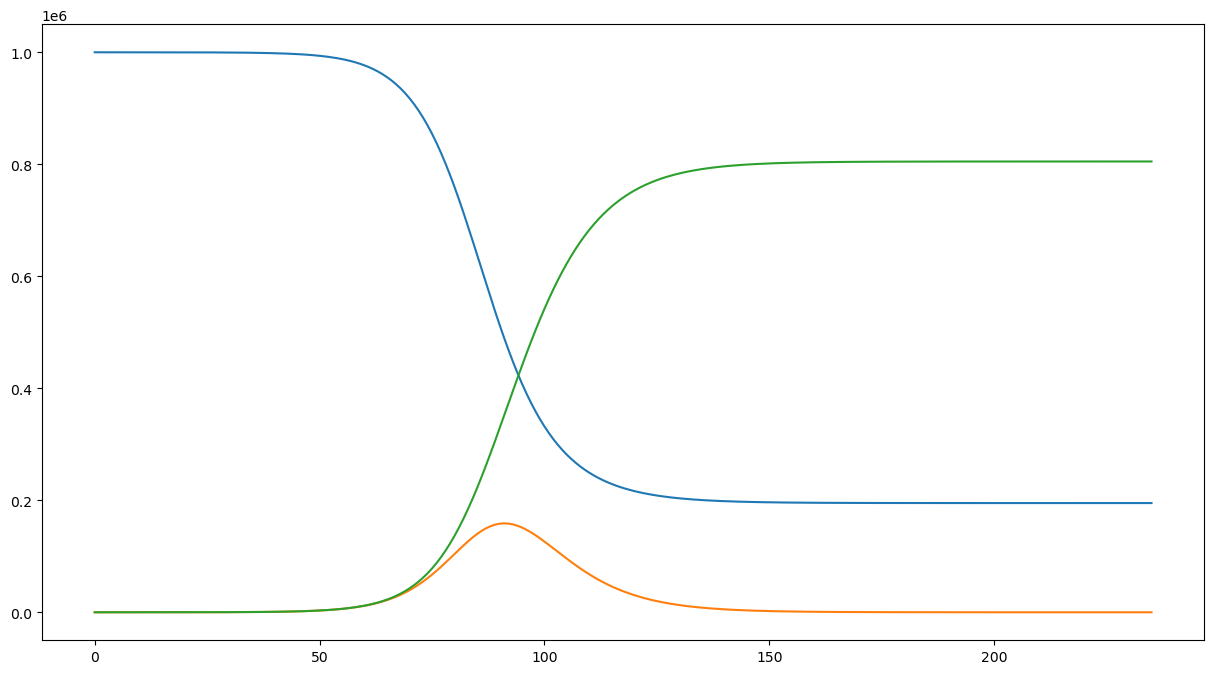

In [45]:
plt.figure(figsize=(15,8))
plt.plot(df1['susceptible'])
plt.plot(df1['cases_active'])
plt.plot(df1['recovered'])
plt.show()

In [37]:
for i in df.columns:
    print(i)

susceptible
new_cases
cases_active
new_recovered
recovered


In [49]:
df2 = pd.DataFrame(data)

while((int(df2.loc[len(df2.index) - 1,'cases_active']) > 0) and (len(df2.index) < 500)):
    idx = len(df2.index)
    df2.loc[idx] = SIRS(df2.loc[idx - 1],pop,1/7,2,1/60)
    if idx % 10 == 0:
        print(f'Day {idx}')
        time.sleep(0.05)

df2

Day 10
Day 20
Day 30
Day 40
Day 50
Day 60
Day 70
Day 80
Day 90
Day 100
Day 110
Day 120
Day 130
Day 140
Day 150
Day 160
Day 170
Day 180
Day 190
Day 200
Day 210
Day 220
Day 230
Day 240
Day 250
Day 260
Day 270
Day 280
Day 290
Day 300
Day 310
Day 320
Day 330
Day 340
Day 350
Day 360
Day 370
Day 380
Day 390
Day 400
Day 410
Day 420
Day 430
Day 440
Day 450
Day 460
Day 470
Day 480
Day 490


,susceptible,new_cases,cases_active,new_recovered,recovered
0,999996.000000,4.000000,4.000000,0.000000,0.000000
1,999994.857147,1.142853,4.571424,0.571429,0.571429
2,999993.560557,1.306114,5.224478,0.653061,1.214965
3,999992.088108,1.492698,5.970822,0.746354,1.941070
4,999990.414523,1.705936,6.823783,0.852975,2.761693
...,...,...,...,...,...
495,499914.261021,7488.540440,52424.971447,7489.405168,447660.767532
496,499887.276425,7487.997389,52423.687200,7489.281635,447689.036375
497,499861.350589,7487.409776,52421.998804,7489.098171,447716.650607
498,499836.514445,7486.780321,52419.922153,7488.856972,447743.563402


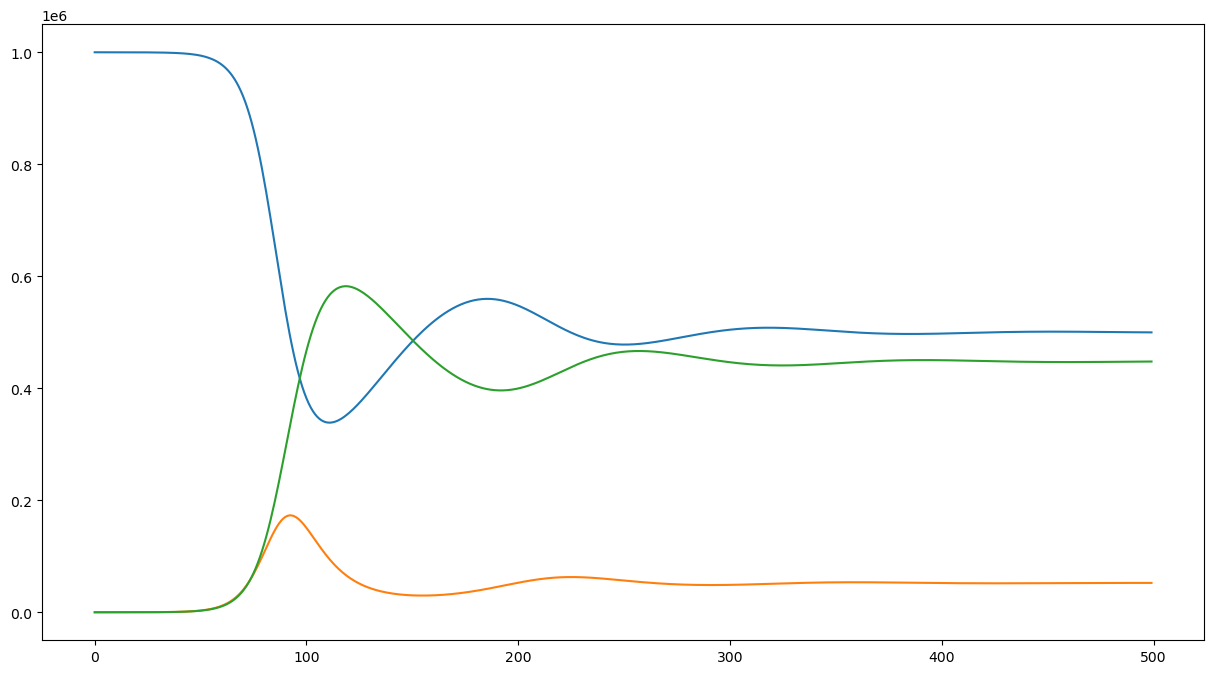

In [50]:
plt.figure(figsize=(15,8))
plt.plot(df2['susceptible'])
plt.plot(df2['cases_active'])
plt.plot(df2['recovered'])
plt.show()

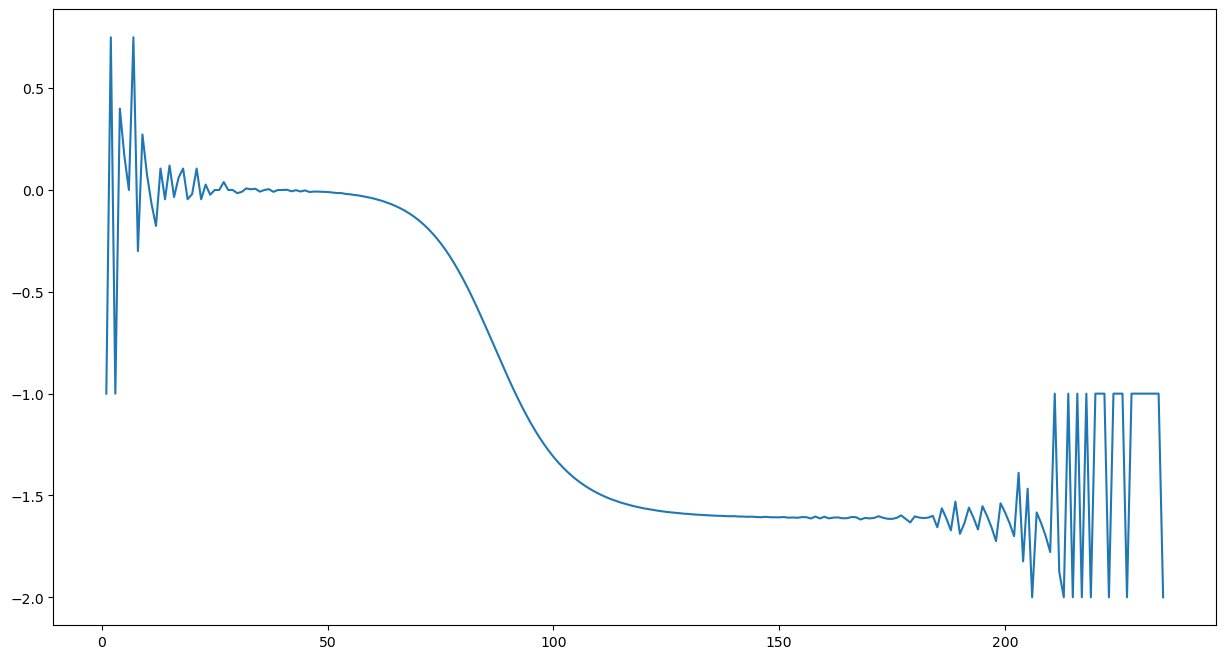

In [57]:
s = (df1['cases_active'] - df1['cases_active'].shift(1)) / df1['cases_active'].shift(1)
s2 = np.maximum(0,(s / (1 / 7)) + 1)

plt.figure(figsize = (15,8))
plt.plot(s2 - 2)
plt.show()

In [77]:
val = [np.nan]
for idx in range(1,len(df.index)):
    temp = SIR(df.loc[idx],pop,1/7,s2[idx])
    
    val.append(int(temp[1]))
    
val = np.array(val)

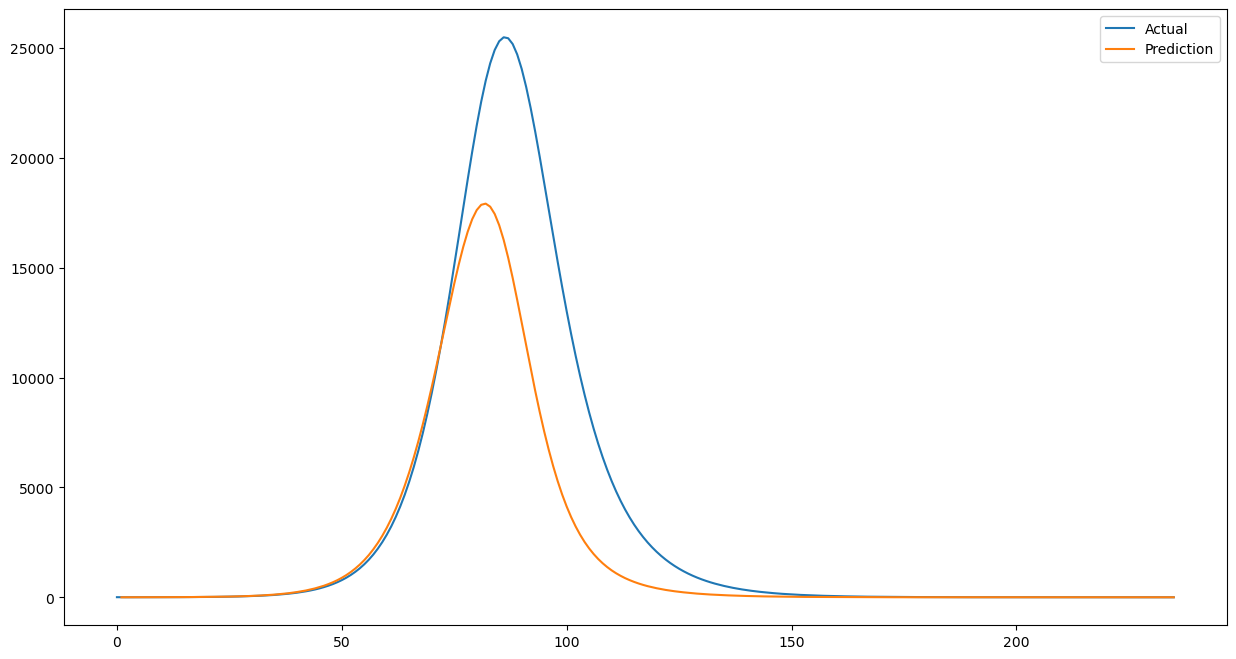

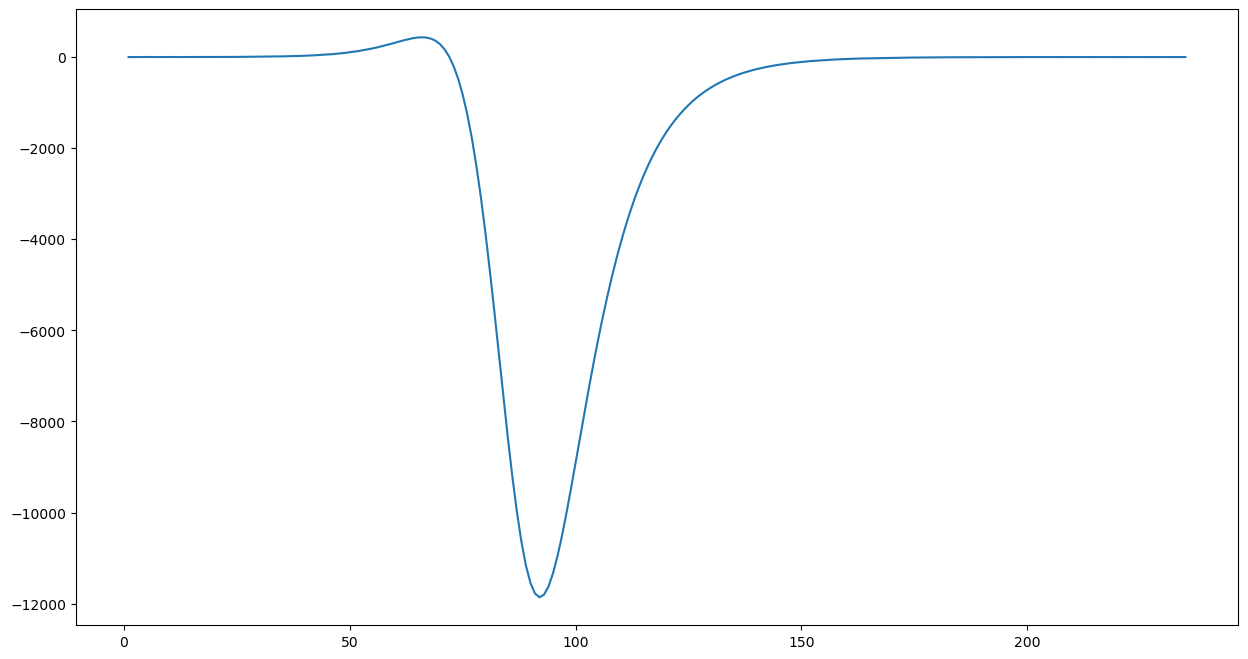

In [79]:
plt.figure(figsize=(15,8))
plt.plot(df['new_cases'])
plt.plot(val)
plt.legend(['Actual','Prediction'])
plt.show()

plt.figure(figsize=(15,8))
plt.plot(val - df['new_cases'])
plt.show()

In [86]:
(abs(val - df['new_cases']) / pop).mean()

0.13525914893617016